In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5, -rand(d) * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S] * k  # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


In [27]:
mean = means[0]
#mean = np.reshape(mean,(mean.shape[0],1))
sigma = sigmas[0]
print(mean.shape)
print(sigma.shape)

(2,)
(2, 2)


In [28]:
print(X.shape)

(100, 2)


In [29]:
X0 = X[0]
print(X0.shape)

(2,)


In [16]:
#X0 = np.reshape(X0,(X.shape[1],1))

In [18]:
X0.shape

(2, 1)

In [30]:
X0 = X0 - mean
X0.shape

(2,)

In [31]:
sinv = np.linalg.inv(sigma)

In [32]:
print(sinv.shape)

(2, 2)


In [33]:
res = np.matmul((X0 - mean).T,np.matmul(sinv,(X0 - mean)))

In [38]:
res.shape

()

## Computing the probability density

In [46]:
def compute_p(X, mean, sigma):
    """
    Compute the probability of each data point in X under a Gaussian distribution

    Args:
        X: (n, d) numpy array, where each row corresponds to a data point
        mean: (d, ) numpy array, the mean of the Gaussian distribution
        sigma: (d, d) numpy array, the covariance matrix of the Gaussian distribution

    Returns:
        p: (n, ) numpy array, the probability of each data point

    >>> compute_p(np.array([[0, 0], [1, 1]]), np.array([0, 0]), np.eye(2))
    array([0.15915494, 0.05854983])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    
    P = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
        Xi = X[i]
        Xi = Xi - mean
        sinv = np.linalg.inv(sigma)
        P[i] = (1/((2*np.pi)**(d/2))*np.sqrt(np.linalg.det(sigma)))*np.exp(-0.5*np.matmul(np.transpose(Xi - mean),np.matmul(np.linalg.inv(sigma),(Xi - mean))))
    P = np.reshape(P,(P.shape[0],))
    return P
    # ***************************************************
    


test(compute_p)

✅ Your `compute_p` passed 1 tests.


In [47]:
ps = [
    compute_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [48]:
assignments = np.argmax(ps, axis=0)
print(assignments)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


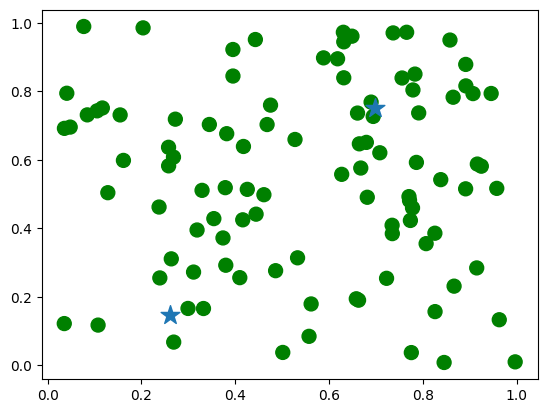

In [49]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()

Solution
===

In [ ]:
def compute_log_p(X, mean, sigma):
    """
    Compute the log probability of each data point in X under a Gaussian distribution

    Args:
        X: (n, d) numpy array, where each row corresponds to a data point
        mean: (d, ) numpy array, the mean of the Gaussian distribution
        sigma: (d, d) numpy array, the covariance matrix of the Gaussian distribution

    Returns:
        log_p: (n, ) numpy array, the log probability of each data point

    >>> compute_log_p(np.array([[0, 0], [1, 1]]), np.array([0, 0]), np.eye(2))
    array([-1.83787707, -2.83787707])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    raise NotImplementedError


test(compute_log_p)

In [ ]:
log_ps = [
    compute_log_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [ ]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

In [ ]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()